In [ ]:
!unzip "/content/drive/MyDrive/VisualVoice-main.zip" -d "/content"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install torch==1.8.1 torchvision==0.9.1 torchaudio==0.8.1
!pip install av facenet-pytorch
!pip install -U openmim
!mim install mmcv
!pip install face-alignment 
!pip install opencv-python

In [ ]:
!pip install numba

In [ ]:
%cd /content/VisualVoice-main

In [ ]:
!ffmpeg -i ./test_videos/interview.mp4 -filter:v fps=fps=25 ./test_videos/interview25fps.mp4
!mv ./test_videos/interview25fps.mp4 ./test_videos/interview.mp4
!python ./utils/detectFaces.py --video_input_path ./test_videos/interview.mp4 --output_path ./test_videos/interview/ --number_of_speakers 2 --scalar_face_detection 1.5 --detect_every_N_frame 8
!ffmpeg -i ./test_videos/interview.mp4 -vn -ar 16000 -ac 1 -ab 192k -f wav ./test_videos/interview/interview.wav
!python ./utils/crop_mouth_from_video.py --video-direc ./test_videos/interview/faces/ --landmark-direc ./test_videos/interview/landmark/ --save-direc ./test_videos/interview/mouthroi/ --convert-gray --filename-path ./test_videos/interview/filename_input/interview.csv
!./

In [ ]:
%cd /content/VisualVoice-main/pretrained_models

In [ ]:
!wget http://dl.fbaipublicfiles.com/VisualVoice/av-speech-separation-model/facial_best.pth
!wget http://dl.fbaipublicfiles.com/VisualVoice/av-speech-separation-model/lipreading_best.pth
!wget http://dl.fbaipublicfiles.com/VisualVoice/av-speech-separation-model/unet_best.pth
!wget http://dl.fbaipublicfiles.com/VisualVoice/av-speech-separation-model/vocal_best.pth

In [ ]:
%cd /content/VisualVoice-main

In [ ]:
!python /content/VisualVoice-main/testRealVideo.py \
--mouthroi_root ./test_videos/interview/mouthroi/ \
--facetrack_root ./test_videos/interview/faces/ \
--audio_path ./test_videos/interview/interview.wav \
--weights_lipreadingnet pretrained_models/lipreading_best.pth \
--weights_facial pretrained_models/facial_best.pth \
--weights_unet pretrained_models/unet_best.pth \
--weights_vocal pretrained_models/vocal_best.pth \
--lipreading_config_path configs/lrw_snv1x_tcn2x.json \
--num_frames 64 \
--audio_length 2.55 \
--hop_size 160 \
--window_size 400 \
--n_fft 512 \
--unet_output_nc 2 \
--normalization \
--visual_feature_type both \
--identity_feature_dim 128 \
--audioVisual_feature_dim 1152 \
--visual_pool maxpool \
--audio_pool maxpool \
--compression_type none \
--reliable_face \
--audio_normalization \
--desired_rms 0.7 \
--number_of_speakers 2 \
--mask_clip_threshold 5 \
--hop_length 2.55 \
--lipreading_extract_feature \
--number_of_identity_frames 1 \
--output_dir_root ./test_videos/interview/

In [ ]:
!pwd

In [ ]:
# mounth ROIs for VoxCeleb2 (train: 1T; val: 20G; seen_heard_test: 88G; unseen_unheard_test: 20G)
# !wget http://dl.fbaipublicfiles.com/VisualVoice/mouth_roi_train.tar.gz
# !wget http://dl.fbaipublicfiles.com/VisualVoice/mouth_roi_val.tar.gz
# !wget http://dl.fbaipublicfiles.com/VisualVoice/mouth_roi_seen_heard_test.tar.gz
# !wget http://dl.fbaipublicfiles.com/VisualVoice/mouth_roi_unseen_unheard_test.tar.gz

In [ ]:
%cd /content/VisualVoice-main/hdf5/VoxCeleb2

In [ ]:
!wget http://dl.fbaipublicfiles.com/VisualVoice/hdf5/VoxCeleb2/train.h5
!wget http://dl.fbaipublicfiles.com/VisualVoice/hdf5/VoxCeleb2/val.h5
!wget http://dl.fbaipublicfiles.com/VisualVoice/hdf5/VoxCeleb2/seen_heard_test.h5
!wget http://dl.fbaipublicfiles.com/VisualVoice/hdf5/VoxCeleb2/unseen_unheard_test.h5

In [ ]:
%cd /content/VisualVoice-main/pretrained_models/cross-modal-pretraining/

In [ ]:
!wget http://dl.fbaipublicfiles.com/VisualVoice/cross-modal-pretraining/facial.pth
!wget http://dl.fbaipublicfiles.com/VisualVoice/cross-modal-pretraining/vocal.pth

In [ ]:
%cd /content/VisualVoice-main/

In [ ]:
!pip install tensorboardX

In [ ]:
!pip install mir_eval pypesq

In [96]:
!python test.py \
--audio1_path /content/VisualVoice-main/speaker1_pink.wav\
--audio2_path /content/VisualVoice-main/speaker2_pink.wav\
--mouthroi1_path /content/VisualVoice-main/test_videos/interview/mouthroi/speaker1.npz \
--mouthroi2_path /content/VisualVoice-main/test_videos/interview/mouthroi/speaker2.npz \
--video1_path /content/VisualVoice-main/test_videos/interview/video_tracked1.mp4 \
--video2_path /content/VisualVoice-main/test_videos/interview/video_tracked2.mp4 \
--num_frames 64 \
--audio_length 2.55 \
--hop_size 160 \
--window_size 400 \
--n_fft 512 \
--weights_lipreadingnet pretrained_models/lipreading_best.pth \
--weights_facial pretrained_models/facial_best.pth \
--weights_unet pretrained_models/unet_best.pth \
--weights_vocal pretrained_models/vocal_best.pth \
--lipreading_config_path configs/lrw_snv1x_tcn2x.json \
--unet_output_nc 2 \
--normalization \
--mask_to_use pred \
--visual_feature_type both \
--identity_feature_dim 128 \
--audioVisual_feature_dim 1152 \
--visual_pool maxpool \
--audio_pool maxpool \
--compression_type none \
--mask_clip_threshold 5 \
--hop_length 2.55 \
--audio_normalization \
--lipreading_extract_feature \
--number_of_identity_frames 1 \
--output_dir_root test 

------------ Options -------------
audio1_path: /content/VisualVoice-main/speaker1_pink.wav
audio2_path: /content/VisualVoice-main/speaker2_pink.wav
audioVisual_feature_dim: 1152
audio_length: 2.55
audio_normalization: True
audio_pool: maxpool
audio_sampling_rate: 16000
batchSize: 32
checkpoints_dir: checkpoints/
compression_type: none
crop_size: 112
data_path: /private/home/rhgao/datasets/VoxCeleb2/
enable_data_augmentation: False
gpu_ids: [0]
hop_length: 2.55
hop_size: 160
hyperbolic_compression_C: 0.1
hyperbolic_compression_K: 10
identity_feature_dim: 128
l2_feature_normalization: False
lipreading_config_path: configs/lrw_snv1x_tcn2x.json
lipreading_extract_feature: True
mask_clip_threshold: 5
mask_to_use: pred
mode: test
model: audioVisual
mouthroi1_path: /content/VisualVoice-main/test_videos/interview/mouthroi/speaker1.npz
mouthroi2_path: /content/VisualVoice-main/test_videos/interview/mouthroi/speaker2.npz
nThreads: 16
n_fft: 512
name: audioVisual
normalization: True
num_frames: 

In [ ]:
!pip install pystoi

In [97]:
!python evaluateSeparation.py --results_dir /content/VisualVoice-main/test/test_videos_interview_video_tracked1VStest_videos_interview_video_tracked2

In [53]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import math
import soundfile as sf

file_path_1 = r'/content/VisualVoice-main/test_videos/interview/speaker1.wav'
file_path_2 = r'/content/VisualVoice-main/test_videos/interview/speaker2.wav'

signal1, sr1 = librosa.load(file_path_1, sr = 16000)
signal2, sr2 = librosa.load(file_path_2, sr = 16000)

STD_n= 0.01
noise1=np.random.normal(0, STD_n, signal1.shape[0])
noise2=np.random.normal(0, STD_n, signal2.shape[0])

signal_noise1 = signal1+noise1
signal_noise2 = signal2+noise2

sf.write('/content/VisualVoice-main/speaker1_Gaussian.wav', signal_noise1, sr1)
sf.write('/content/VisualVoice-main/speaker2_Gaussian.wav', signal_noise2, sr2)


In [56]:
#             sdr |     sdr_mixed | sdr-sdr_mixed| sir |    sar      | pesq_score | stoi_score


In [57]:
# default: 16.641126    1.103871   15.537255   31.312811   16.802362   4.090935     0.972742

In [58]:
# std->0.001: 6.645293  35.920790   -29.275497  29.404192   6.685381    3.271109     0.782367

In [59]:
# std->0.01:  6.036002  16.694909   -10.658907  14.925879    7.430685   2.518695     0.666836

In [60]:
# std->0.1:   0.189148  1.719373    -1.530226    2.541116    6.026504    2.114555     0.516289

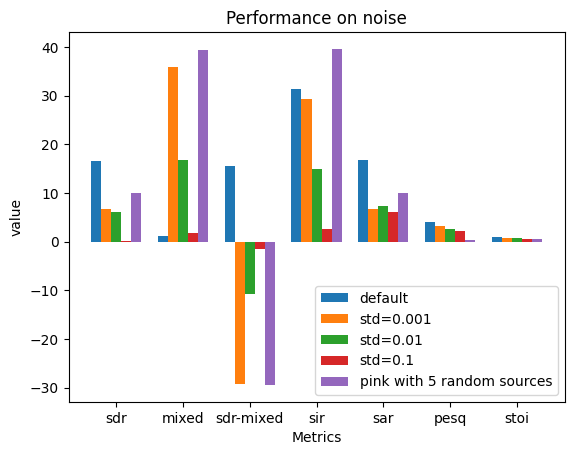

In [98]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['sdr', 'mixed', 'sdr-mixed', 'sir','sar' ,'pesq','stoi']
AA = [16.641126, 1.103871 ,  15.537255  , 31.312811  , 16.802362  , 4.090935   ,  0.972742]
BB=[ 6.645293 , 35.920790 ,  -29.275497 , 29.404192 ,  6.685381 ,   3.271109  ,   0.782367]
CC=  [6.036002 , 16.694909 ,  -10.658907 , 14.925879  ,  7.430685 ,  2.518695  ,   0.666836]
DD = [0.189148 , 1.719373  ,  -1.530226  ,  2.541116  ,  6.026504 ,   2.114555  ,   0.516289]
pink = [10.015718 ,39.440805, -29.425087, 39.596889 ,10.021169 ,0.346993, 0.488478]
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, AA, 0.15, label = 'default')
plt.bar(X_axis - 0.15, BB, 0.15, label = 'std=0.001')
plt.bar(X_axis + 0, CC, 0.15, label = 'std=0.01')
plt.bar(X_axis + 0.15, DD, 0.15, label = 'std=0.1')
plt.bar(X_axis + 0.3, pink, 0.15, label = 'pink with 5 random sources')


  
plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("value")
plt.title("Performance on noise")
plt.legend()
plt.show()

In [69]:
import pandas as pd
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [95]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import math
import soundfile as sf

file_path_1 = r'/content/VisualVoice-main/test_videos/interview/speaker1.wav'
file_path_2 = r'/content/VisualVoice-main/test_videos/interview/speaker2.wav'

signal1, sr1 = librosa.load(file_path_1, sr = 16000)
signal2, sr2 = librosa.load(file_path_2, sr = 16000)

STD_n= 0.01
noise1=voss(signal1.shape[0], ncols=10)
noise2=voss(signal2.shape[0], ncols=10)

signal_noise1 = signal1+noise1
signal_noise2 = signal2+noise2

sf.write('/content/VisualVoice-main/speaker1_pink.wav', signal_noise1, sr1)
sf.write('/content/VisualVoice-main/speaker2_pink.wav', signal_noise2, sr2)


In [ ]:
# 10.015718 39.440805 -29.425087 39.596889 10.021169 0.346993 0.488478->5
# 3.693293 11.069886 -7.376592 10.644227 5.090265 nan 0.413637->1
# 4.264378 16.954055 -12.689677 15.541895 4.805319 nan 0.318129->2
# 5.720115 23.696383 -17.976268 21.547292 5.875335 2.594327 0.333121->3
# 5.126752 234.528110 -229.401358 203.231475 5.126752 2.803485 0.228740->10


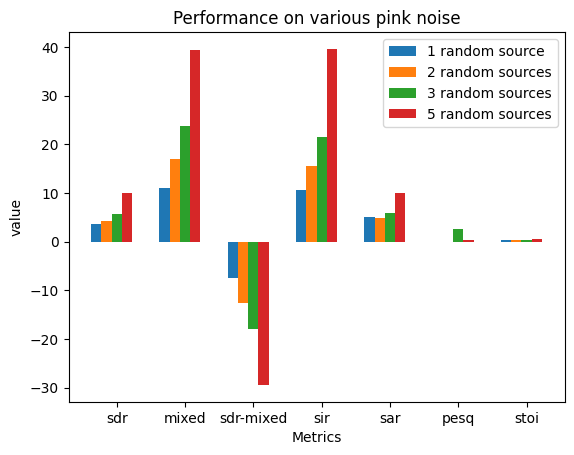

In [103]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['sdr', 'mixed', 'sdr-mixed', 'sir','sar' ,'pesq','stoi']
A1 = [3.693293 ,11.069886 ,-7.376592, 10.644227 ,5.090265, 0 , 0.413637]
B2= [4.264378, 16.954055, -12.689677, 15.541895, 4.805319 , 0,0.318129]
C3=  [5.720115 ,23.696383 ,-17.976268 ,21.547292, 5.875335 ,2.594327, 0.333121]
D5 = [10.015718 ,39.440805, -29.425087, 39.596889, 10.021169 ,0.346993, 0.488478]
# p10 = [5.126752 ,234.528110 ,-229.401358, 203.231475, 5.126752, 2.803485 ,0.228740]
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, A1, 0.15, label = '1 random source ')
plt.bar(X_axis - 0.15, B2, 0.15, label = '2 random sources')
plt.bar(X_axis + 0, C3, 0.15, label = '3 random sources')
plt.bar(X_axis + 0.15, D5, 0.15, label = '5 random sources')
# plt.bar(X_axis + 0.3, p10, 0.15, label = '10 random sources')


  
plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("value")
plt.title("Performance on various pink noise")
plt.legend()
plt.show()